In [7]:
import pandas as pd
import numpy as np

from sklearn import datasets
data= datasets.load_diabetes()


In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [9]:
data['data'].shape

(442, 10)

In [11]:
data['target'].shape

(442,)

In [13]:
df = pd.DataFrame(data['data'], index=data['target'], columns=data['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
132.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


## target이 당뇨병의 수치, 나머지 feature names 에 속하는 age, sex, bmi 등등 은 변수라고 보면 됩니다.

## 즉, 442명의 사람들을 상대로 10가지의 특성들을 나열한 것.

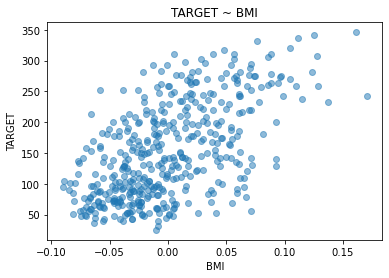

In [15]:
import matplotlib.pyplot as plt

x=df.bmi.values
y=df.index.values

plt.scatter(x,y,alpha=0.5)
plt.title("TARGET ~ BMI")
plt.xlabel("BMI")
plt.ylabel('TARGET')
plt.show()

# 산점도

## 산점도를 이용하면 두 변수간의 직선적인 관계를 대략적으로 파악은 가능하지만, 두 변수 사이의 관계를 어떠한 수치로 표현하지는 않는다.
## 그렇기에 우리는 두 변수 간의 관계를 수치로 표현하기 위해 공분산 및 상관계수를 이용한다.


## 공분산은 2개의 확률변수의 상관정도를 나타내는 값인데, 만약 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때 다른 값도 상승하면 공분산의 값은 양수, 반대로 다른 값이 하강하는 경향을 보이면 공분산의 값은 음수가 나온다.


## 공분산은 상관관계의 상승 / 하강으로 경향을 이해할 수는 있으나
## 2개 변수의 측정 단위의 크기에 따라 값이 달라지므로 절대적인 정도를 파악하기에는 한계가 있다. 결과 값에 대해 어느 정도의 양의 상관관계인지 가늠하기가 쉽지 않다...

# 상관계수

## 이런 공분산을 표준화 시킨 것이 "상관계수"

## 상관계수는 각 변수의 표준편차를 분모로 나눠주면 된다.
## 상관계수는 -1~1 사이의 값을 가지고, 0일 경우는 두 변수 간의 선형관계가 전혀 없다는 것을 의미
## 보통 0.3~0.7 사이면, 뚜렷한 양적 선형관계로 0.7과 1.0 사이는 강한 양적 선형관계로 간주한다.

In [17]:
np.corrcoef(x,y)[0,1] # -> 따라서 이 값은 BMI와 Target은 뚜렷한 양적 선형관계를 이루고 있다고 볼 수 있다.

0.5864501344746886

# 상관계수의 검정

## 상관계수 값 자체가 유의미한가를 검정하는 것
## 그 중 하나로 p-value를 많이 이용함
## scipy 패키지의 stats.perasonr()을 이용하면 상관계수와 p-value를 동시에 얻을 수 있다.

In [21]:
import scipy.stats as stats
print(stats.pearsonr(x,y))


print("두번째 결과 값이 p-value 인데, 귀무가설 '상관관계가 없다'에 대한 검정 결과인 p-value가 3.46e-42라는 0에 아주 가까운 값이 나왔으므로 귀무가설을 기각할 수 있음을 알 수 있다.")

(0.5864501344746886, 3.4660064451655095e-42)
두번째 결과 값이 p-value 인데, 귀무가설 '상관관계가 없다'에 대한 검정 결과인 p-value가 3.46e-42라는 0에 아주 가까운 값이 나왔으므로 귀무가설을 기각할 수 있음을 알 수 있다.
